In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

In [2]:
df = pd.read_csv('lotto.csv')

In [3]:
display(df)

,id,draw_date,winning_nr1,winning_nr2,winning_nr3,winning_nr4,winning_nr5,winning_nr6
0,4045,10.1.2004,6,10,26,38,49,20
1,4046,14.1.2004,31,43,30,8,19,37
2,4047,17.1.2004,3,31,41,45,19,24
3,4048,21.1.2004,48,38,6,39,28,1
4,4049,24.1.2004,16,13,20,44,36,6
...,...,...,...,...,...,...,...,...
2976,7021,2.4.2024,49,11,12,15,34,10
2977,7022,4.4.2024,13,6,44,35,27,2
2978,7023,6.4.2024,49,29,45,39,19,47
2979,7024,9.4.2024,29,6,2,31,44,25


In [4]:
df.dtypes

id              int64
draw_date      object
winning_nr1     int64
winning_nr2     int64
winning_nr3     int64
winning_nr4     int64
winning_nr5     int64
winning_nr6     int64
dtype: object

In [5]:
df['draw_date'] = pd.to_datetime(df['draw_date'], format='%d.%m.%Y')

In [6]:
df.dtypes

id                      int64
draw_date      datetime64[ns]
winning_nr1             int64
winning_nr2             int64
winning_nr3             int64
winning_nr4             int64
winning_nr5             int64
winning_nr6             int64
dtype: object

In [7]:
df.isnull().sum()

id             0
draw_date      0
winning_nr1    0
winning_nr2    0
winning_nr3    0
winning_nr4    0
winning_nr5    0
winning_nr6    0
dtype: int64

winning_nr1    24.725931
winning_nr2    25.123449
winning_nr3    25.126132
winning_nr4    24.641396
winning_nr5    24.552499
winning_nr6    25.078833
dtype: float64


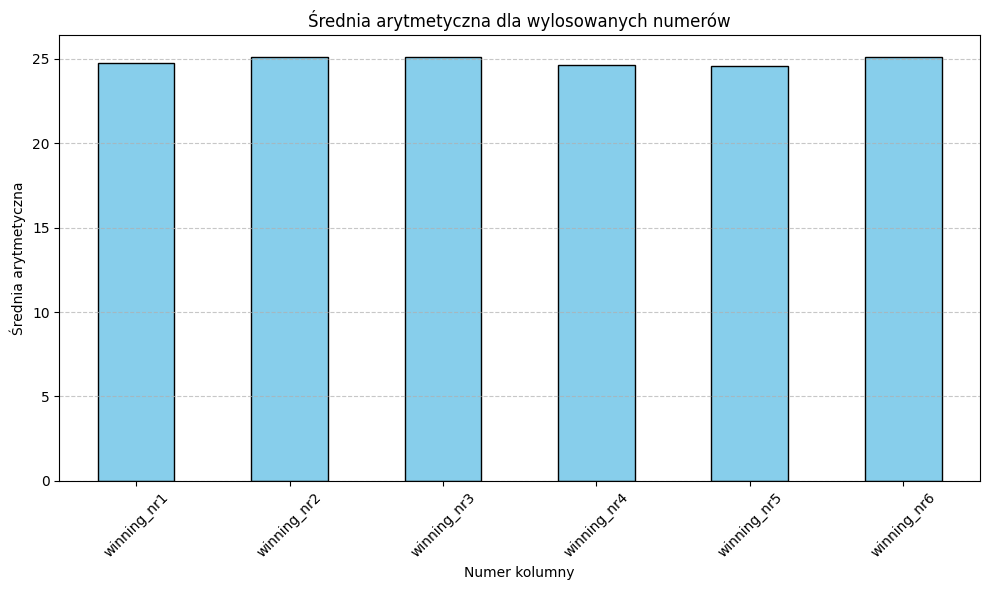

In [8]:
average_winning_numbers = df[['winning_nr1', 'winning_nr2', 'winning_nr3', 'winning_nr4', 'winning_nr5', 'winning_nr6']].mean()
print(average_winning_numbers)

plt.figure(figsize=(10, 6))
average_winning_numbers.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Średnia arytmetyczna dla wylosowanych numerów')
plt.xlabel('Numer kolumny')
plt.ylabel('Średnia arytmetyczna')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

winning_nr1    14.253754
winning_nr2    13.933839
winning_nr3    14.228016
winning_nr4    14.205794
winning_nr5    14.287191
winning_nr6    14.139365
dtype: float64


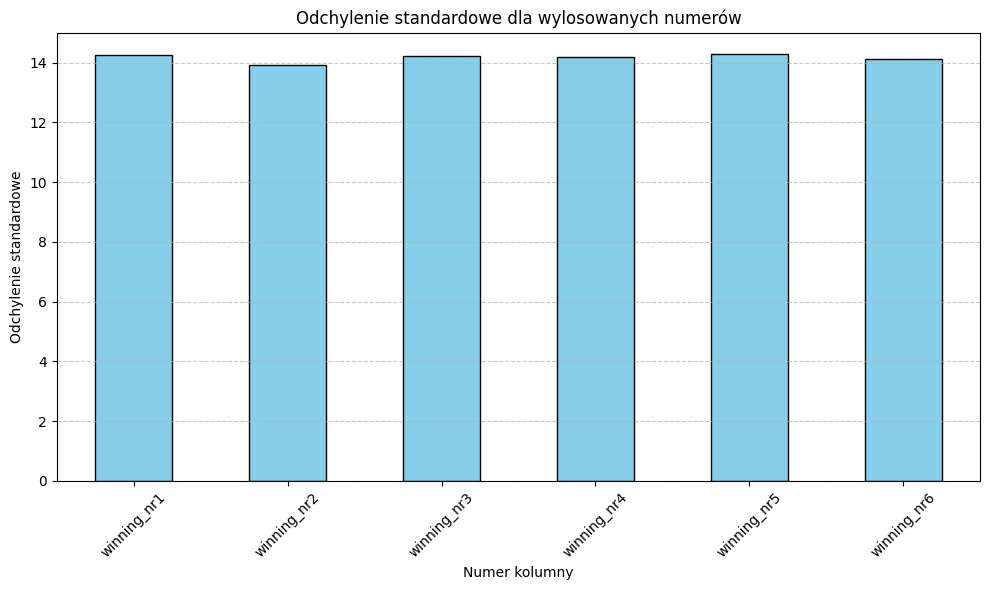

In [9]:
std_deviation = df[['winning_nr1', 'winning_nr2', 'winning_nr3', 'winning_nr4', 'winning_nr5', 'winning_nr6']].std()
print(std_deviation)

plt.figure(figsize=(10, 6))
std_deviation.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Odchylenie standardowe dla wylosowanych numerów')
plt.xlabel('Numer kolumny')
plt.ylabel('Odchylenie standardowe')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

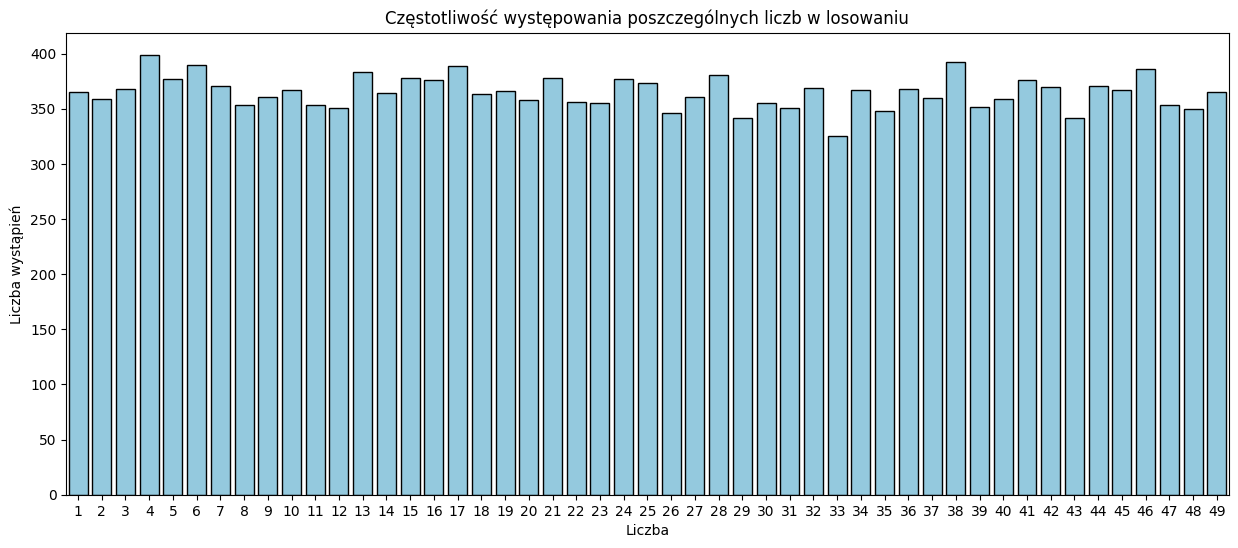

In [10]:
plt.figure(figsize=(15, 6))
all_numbers = df[['winning_nr1', 'winning_nr2', 'winning_nr3', 'winning_nr4', 'winning_nr5', 'winning_nr6']].values.flatten()
sns.barplot(x=pd.Series(all_numbers).value_counts().index, y=pd.Series(all_numbers).value_counts(), color='skyblue', edgecolor='black')
plt.title('Częstotliwość występowania poszczególnych liczb w losowaniu')
plt.xlabel('Liczba')
plt.ylabel('Liczba wystąpień')
plt.xticks(range(0, 49))
plt.show()

5 najczęściej występujących liczb w losowaniach:


,Liczba,Liczba wystąpień
0,4,399
1,38,392
2,6,390
3,17,389
4,46,386


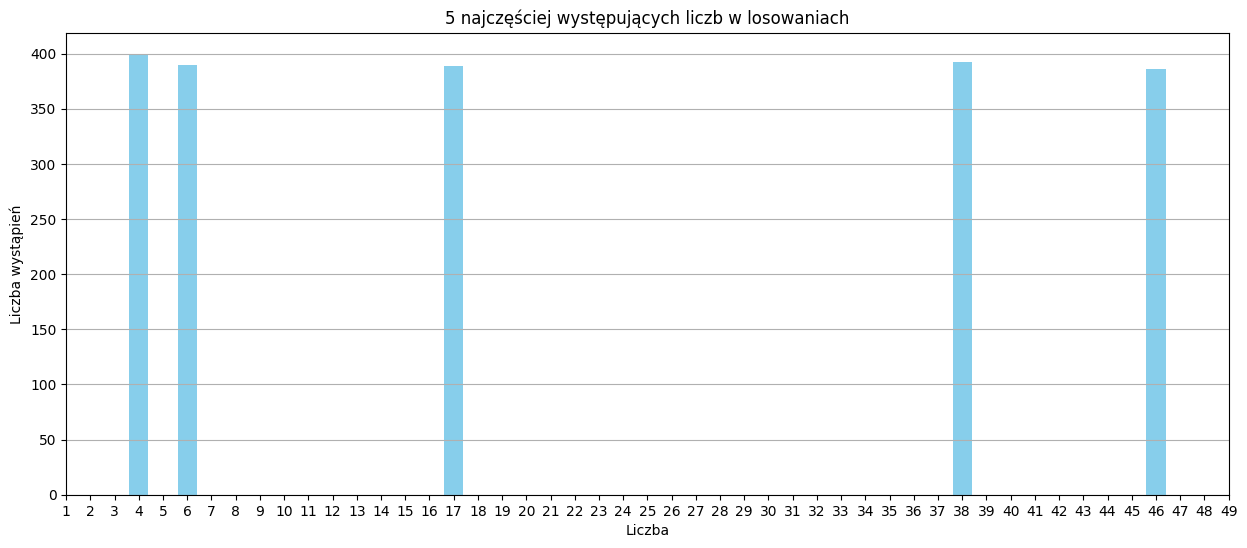

5 najrzadziej występujących liczb w losowaniach:


,Liczba,Liczba wystąpień
4,33,325
2,43,342
3,29,342
1,26,346
0,35,348


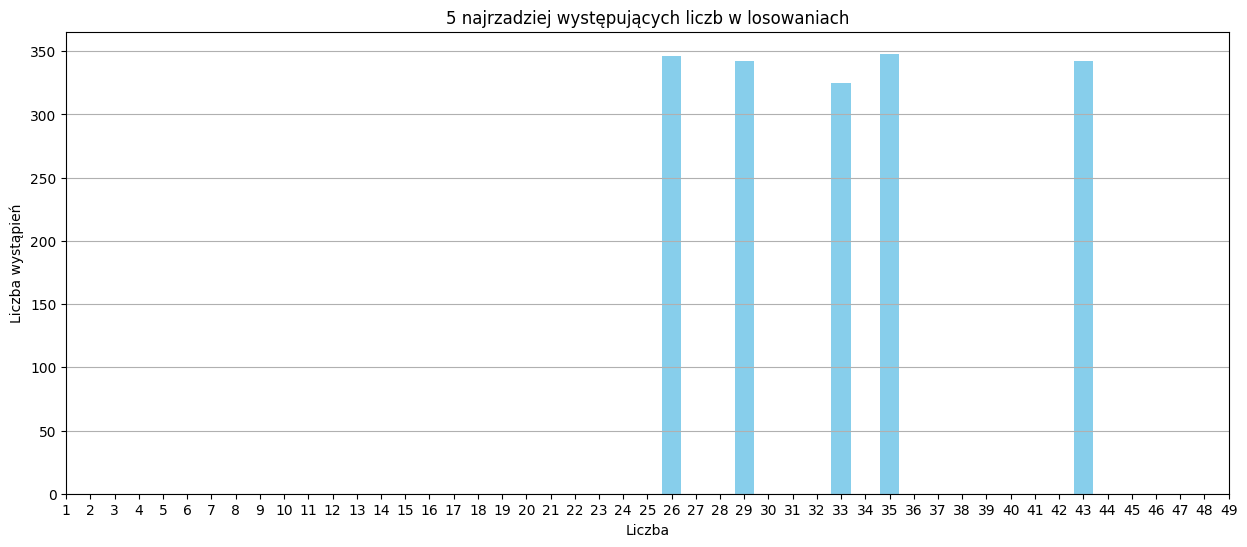

In [11]:
number_counts = df[['winning_nr1', 'winning_nr2', 'winning_nr3', 'winning_nr4', 'winning_nr5', 'winning_nr6']].stack().value_counts()

top_5_common = number_counts.head()
top_5_rare = number_counts.tail()

common_df = pd.DataFrame({'Liczba': top_5_common.index, 'Liczba wystąpień': top_5_common.values})
rare_df = pd.DataFrame({'Liczba': top_5_rare.index, 'Liczba wystąpień': top_5_rare.values}).sort_values(by='Liczba wystąpień', ascending=True)

print("5 najczęściej występujących liczb w losowaniach:")
display(common_df)

plt.figure(figsize=(15, 6))
plt.bar(common_df['Liczba'], common_df['Liczba wystąpień'], color='skyblue')
plt.title('5 najczęściej występujących liczb w losowaniach')
plt.xlabel('Liczba')
plt.ylabel('Liczba wystąpień')
plt.xticks(range(1, 50))
plt.grid(axis='y')
plt.show()

print("5 najrzadziej występujących liczb w losowaniach:")
display(rare_df)

plt.figure(figsize=(15, 6))
plt.bar(rare_df['Liczba'], rare_df['Liczba wystąpień'], color='skyblue')
plt.title('5 najrzadziej występujących liczb w losowaniach')
plt.xlabel('Liczba')
plt.ylabel('Liczba wystąpień')
plt.xticks(range(1, 50))
plt.grid(axis='y')
plt.show()

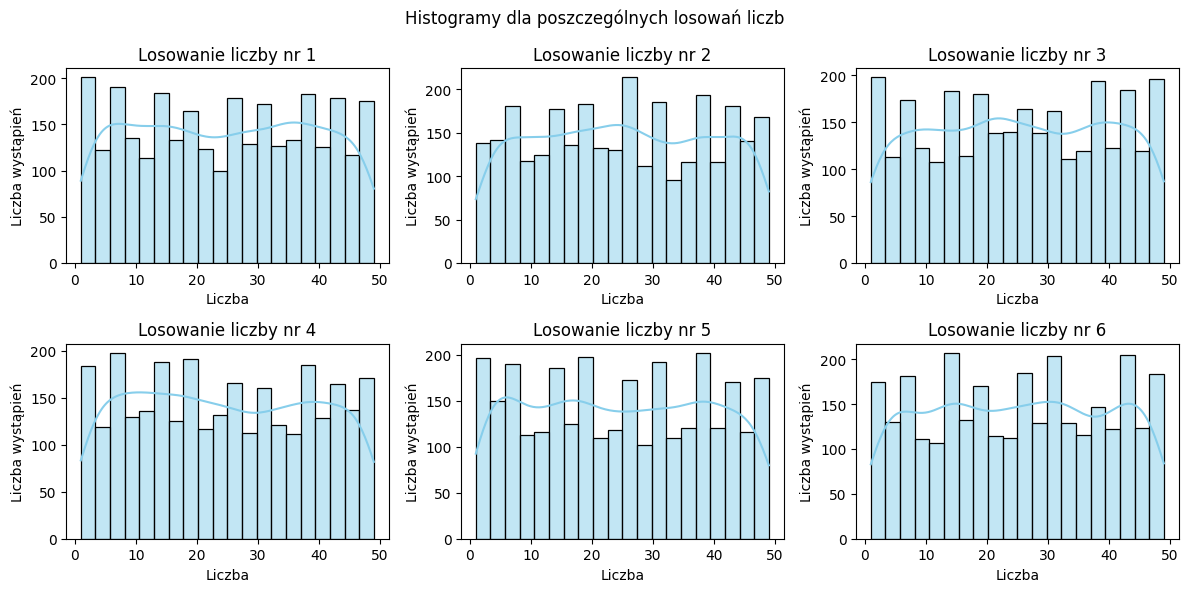

In [12]:
plt.figure(figsize=(12, 6))

for i in range(1, 7):
    plt.subplot(2, 3, i)
    sns.histplot(df[f"winning_nr{i}"], bins=20, kde=True, color='skyblue')
    plt.title(f"Losowanie liczby nr {i}")
    plt.xlabel('Liczba')
    plt.ylabel('Liczba wystąpień')

plt.suptitle("Histogramy dla poszczególnych losowań liczb")
plt.tight_layout()
plt.show()

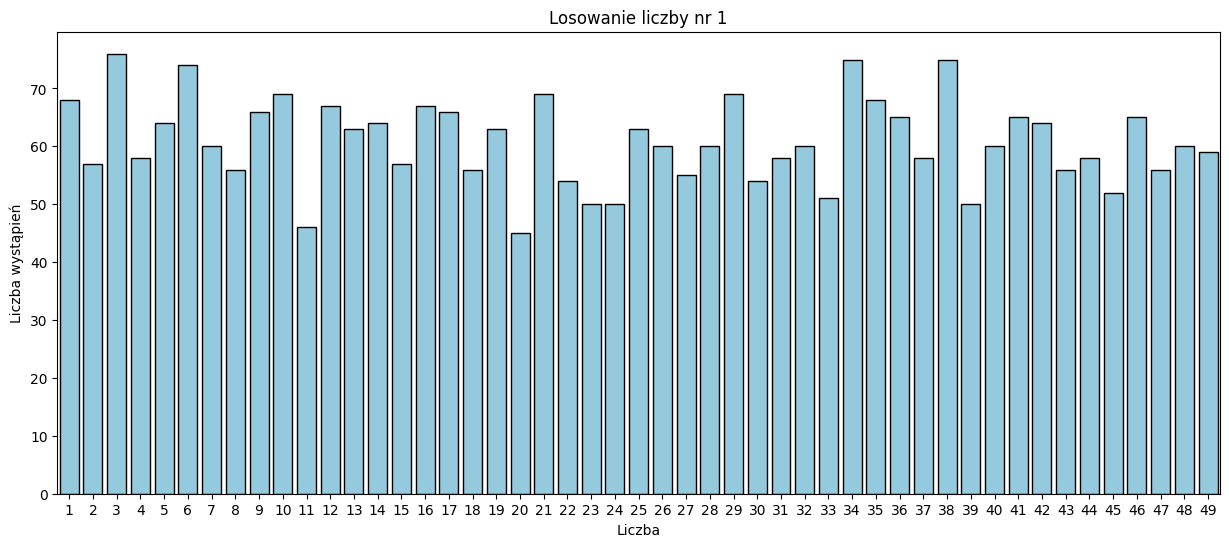

Najczęściej występująca liczba w losowaniu nr 1:


,Liczba,Liczba wystąpień
0,3,76


Najrzadziej występująca liczba w losowaniu nr 1:


,Liczba,Liczba wystąpień
0,20,45


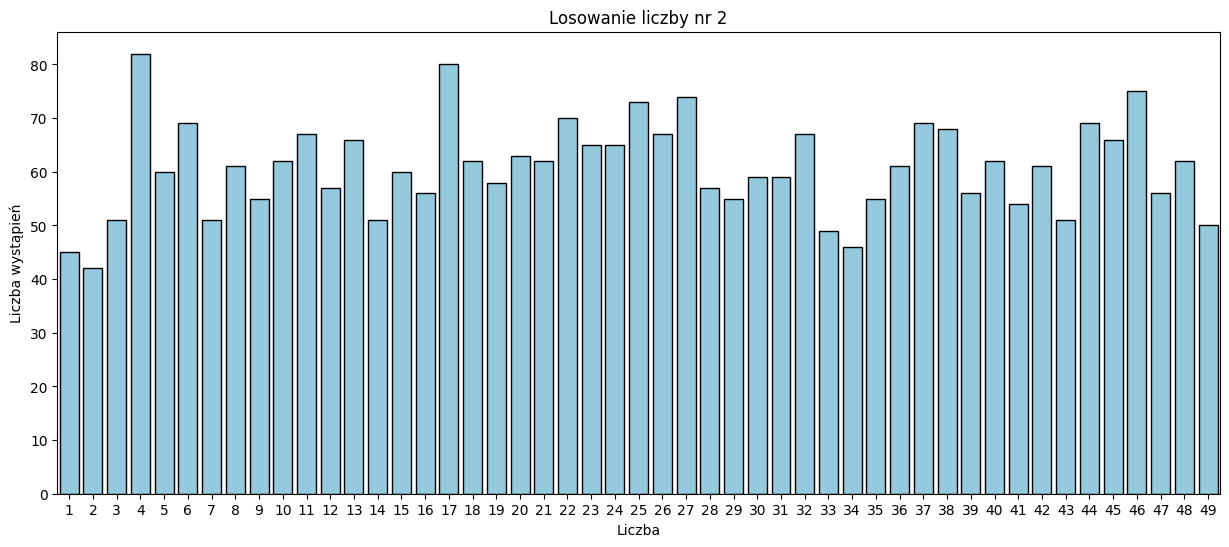

Najczęściej występująca liczba w losowaniu nr 2:


,Liczba,Liczba wystąpień
0,4,82


Najrzadziej występująca liczba w losowaniu nr 2:


,Liczba,Liczba wystąpień
0,2,42


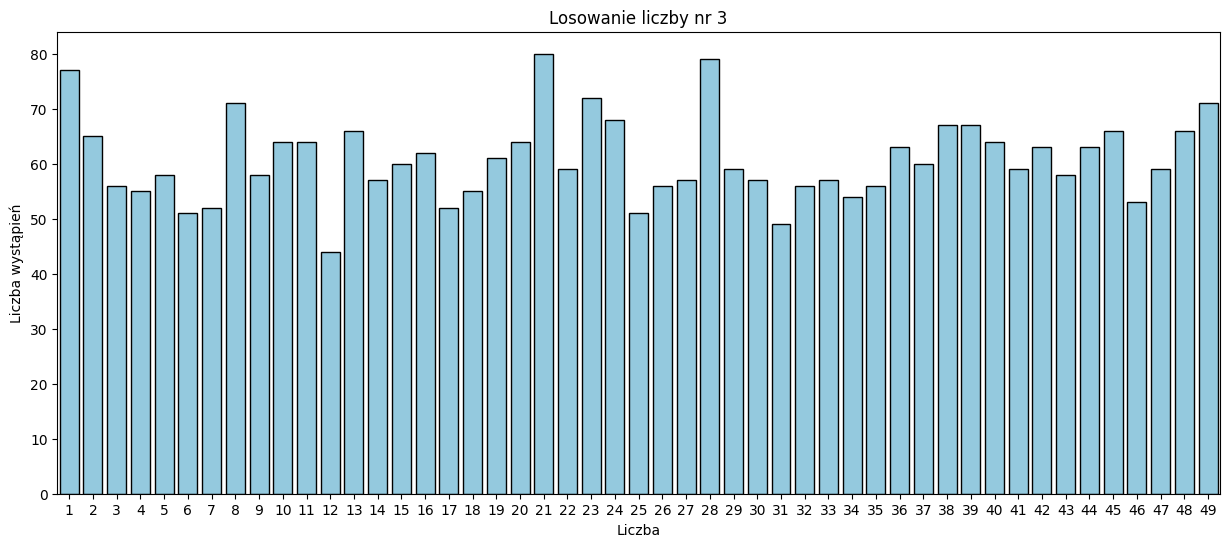

Najczęściej występująca liczba w losowaniu nr 3:


,Liczba,Liczba wystąpień
0,21,80


Najrzadziej występująca liczba w losowaniu nr 3:


,Liczba,Liczba wystąpień
0,12,44


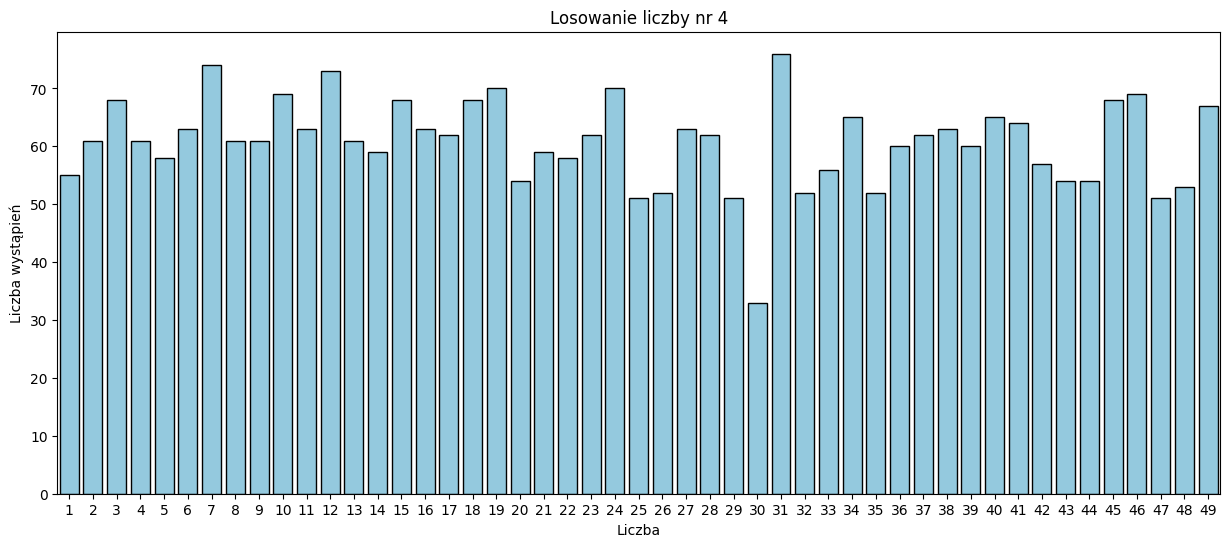

Najczęściej występująca liczba w losowaniu nr 4:


,Liczba,Liczba wystąpień
0,31,76


Najrzadziej występująca liczba w losowaniu nr 4:


,Liczba,Liczba wystąpień
0,30,33


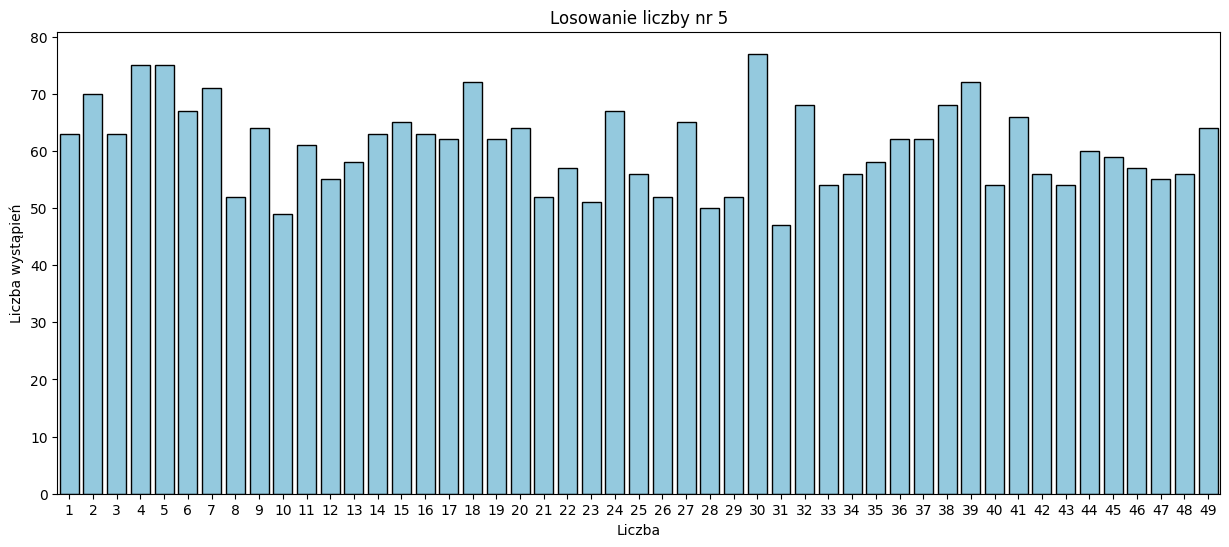

Najczęściej występująca liczba w losowaniu nr 5:


,Liczba,Liczba wystąpień
0,30,77


Najrzadziej występująca liczba w losowaniu nr 5:


,Liczba,Liczba wystąpień
0,31,47


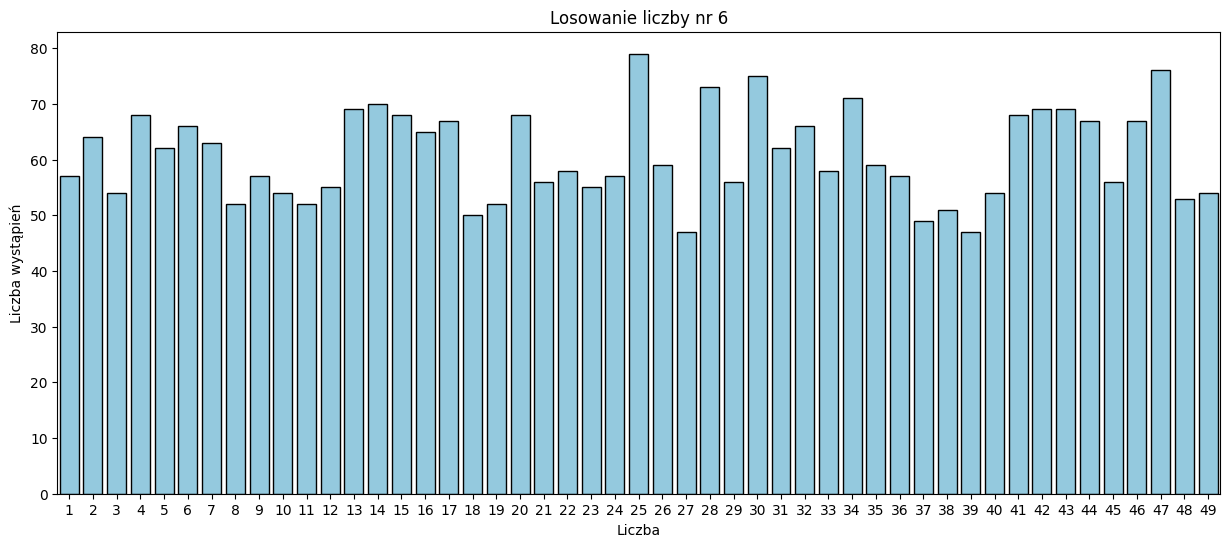

Najczęściej występująca liczba w losowaniu nr 6:


,Liczba,Liczba wystąpień
0,25,79


Najrzadziej występująca liczba w losowaniu nr 6:


,Liczba,Liczba wystąpień
0,27,47


In [13]:
for i in range(6):
    counts = df[f"winning_nr{i+1}"].value_counts().sort_index()
    
    plt.figure(figsize=(15, 6))
    sns.barplot(x=counts.index, y=counts.values, color='skyblue', edgecolor='black')
    plt.title(f'Losowanie liczby nr {i+1}')
    plt.xlabel('Liczba')
    plt.ylabel('Liczba wystąpień')
    plt.show()
    
    most_common_number = counts.idxmax()
    most_common_count = counts.max()
    
    least_common_number = counts.idxmin()
    least_common_count = counts.min()
    
    most_common_table = pd.DataFrame({
        'Liczba': [most_common_number], 
        'Liczba wystąpień': [most_common_count]
    })
    print(f"Najczęściej występująca liczba w losowaniu nr {i+1}:")
    display(most_common_table)
    
    least_common_table = pd.DataFrame({
        'Liczba': [least_common_number], 
        'Liczba wystąpień': [least_common_count]
    })
    print(f"Najrzadziej występująca liczba w losowaniu nr {i+1}:")
    display(least_common_table)


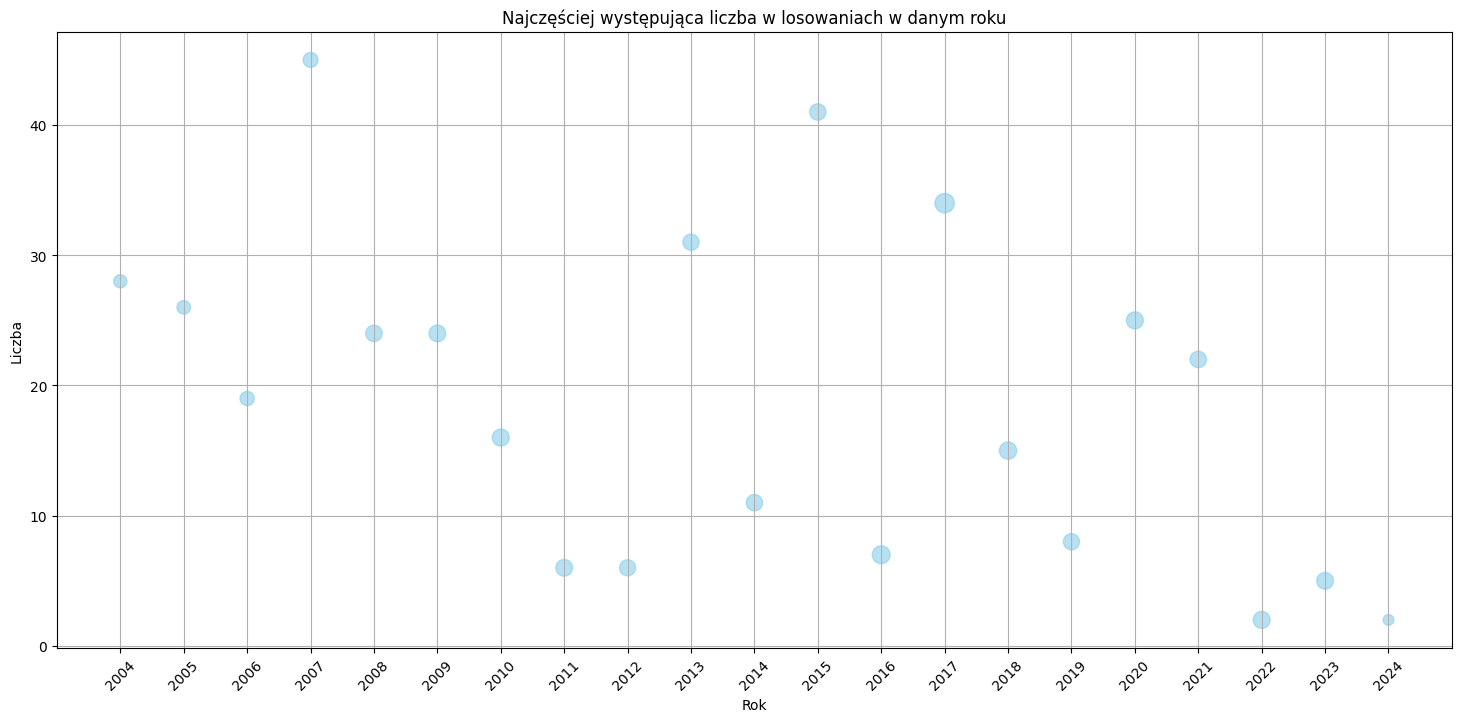

,Liczba,Liczba wystąpień
2004,28,18
2005,26,19
2006,19,21
2007,45,23
2008,24,28
2009,24,29
2010,16,30
2011,6,29
2012,6,27
2013,31,27


In [14]:
df['year'] = df['draw_date'].dt.year

most_common_numbers_per_year = {}

for year in df['year'].unique():
    year_data = df[df['year'] == year]
    
    all_winning_numbers = pd.concat([year_data[col] for col in ['winning_nr1', 'winning_nr2', 'winning_nr3', 'winning_nr4', 'winning_nr5', 'winning_nr6']])
    
    counts = all_winning_numbers.value_counts()
    
    most_common_number = counts.idxmax()
    most_common_count = counts.max()
    
    most_common_numbers_per_year[year] = {'Liczba': most_common_number, 'Liczba wystąpień': most_common_count}

result_df = pd.DataFrame.from_dict(most_common_numbers_per_year, orient='index')

plt.figure(figsize=(18, 8))
plt.scatter(result_df.index, result_df['Liczba'], s=result_df['Liczba wystąpień'] * 5, color='skyblue', alpha=0.6)
plt.title('Najczęściej występująca liczba w losowaniach w danym roku')
plt.xlabel('Rok')
plt.ylabel('Liczba')
plt.xticks(result_df.index, rotation=45)
plt.grid(True)
plt.show()

display(result_df)

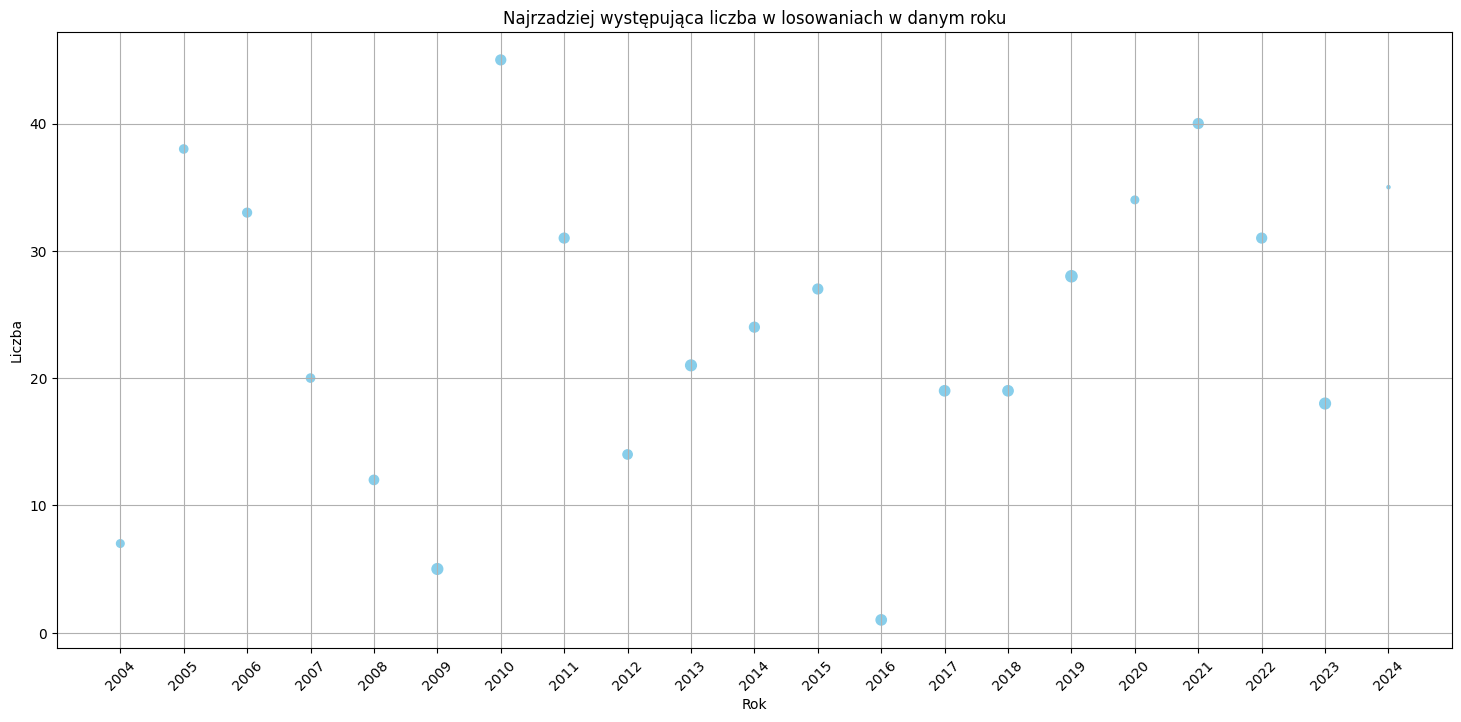

,Liczba,Liczba wystąpień
2004,7,6
2005,38,7
2006,33,8
2007,20,7
2008,12,9
2009,5,12
2010,45,10
2011,31,10
2012,14,9
2013,21,12


In [15]:
least_common_numbers_per_year = {}

for year in df['year'].unique():
    year_data = df[df['year'] == year]
    
    all_winning_numbers = pd.concat([year_data[col] for col in ['winning_nr1', 'winning_nr2', 'winning_nr3', 'winning_nr4', 'winning_nr5', 'winning_nr6']])
    
    counts = all_winning_numbers.value_counts()
    
    least_common_number = counts.idxmin()
    least_common_count = counts.min()
    
    least_common_numbers_per_year[year] = {'Liczba': least_common_number, 'Liczba wystąpień': least_common_count}

result_df_least_common = pd.DataFrame.from_dict(least_common_numbers_per_year, orient='index')

plt.figure(figsize=(18, 8))
plt.scatter(result_df_least_common.index, result_df_least_common['Liczba'], s=result_df_least_common['Liczba wystąpień'] * 5, color='skyblue', alpha=1)
plt.title('Najrzadziej występująca liczba w losowaniach w danym roku')
plt.xlabel('Rok')
plt.ylabel('Liczba')
plt.xticks(result_df_least_common.index, rotation=45)
plt.grid(True)
plt.show()

display(result_df_least_common)

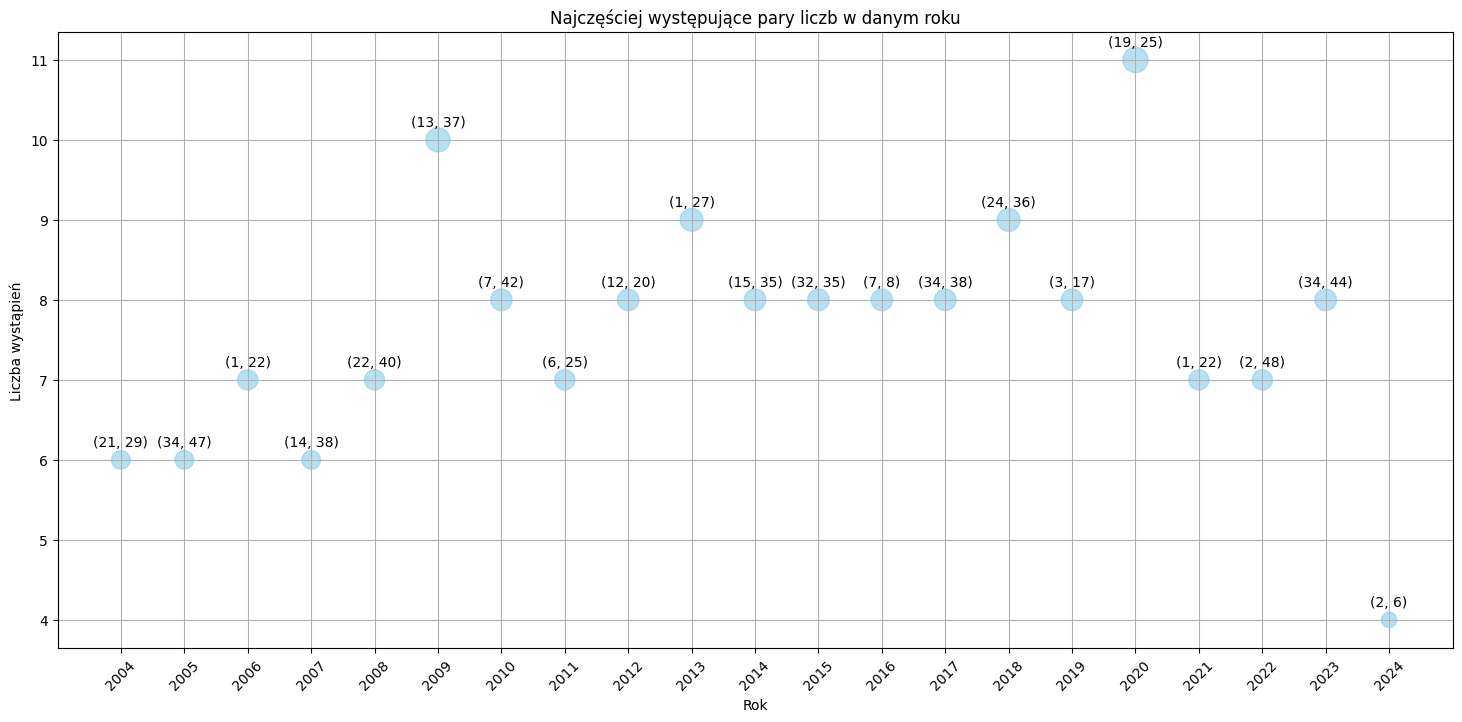

In [16]:
most_common_pairs_per_year = []

for year in df['year'].unique():
    year_data = df[df['year'] == year]
    pairs_df = year_data[['winning_nr1', 'winning_nr2', 'winning_nr3', 'winning_nr4', 'winning_nr5', 'winning_nr6']].apply(lambda row: list(combinations(sorted(row), 2)), axis=1).explode().value_counts()
    most_common_pairs_per_year.append((year, pairs_df.idxmax(), pairs_df.max()))

result_df_most_common = pd.DataFrame(most_common_pairs_per_year, columns=['Rok', 'Para liczb', 'Liczba wystąpień'])

plt.figure(figsize=(18, 8))
plt.scatter(result_df_most_common['Rok'], result_df_most_common['Liczba wystąpień'], s=result_df_most_common['Liczba wystąpień'] * 30, color='skyblue', alpha=0.6)

for i in range(len(result_df_most_common)):
    plt.annotate(result_df_most_common['Para liczb'].iloc[i], (result_df_most_common['Rok'].iloc[i], result_df_most_common['Liczba wystąpień'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Najczęściej występujące pary liczb w danym roku')
plt.xlabel('Rok')
plt.ylabel('Liczba wystąpień')
plt.xticks(result_df_most_common['Rok'], rotation=45)
plt.grid(True)
plt.show()

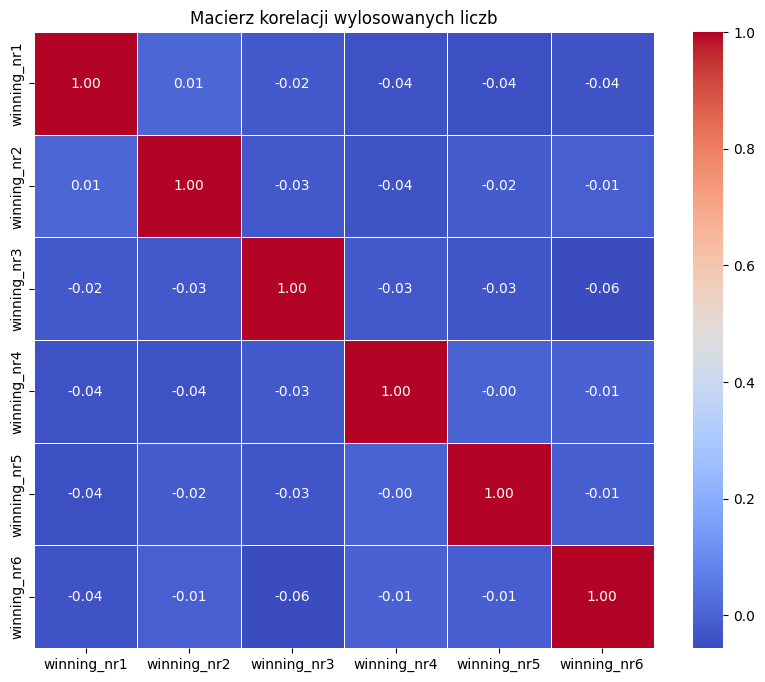

In [17]:
winning_numbers = df[['winning_nr1', 'winning_nr2', 'winning_nr3', 'winning_nr4', 'winning_nr5', 'winning_nr6']]
correlation_matrix = winning_numbers.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Macierz korelacji wylosowanych liczb')
plt.show()

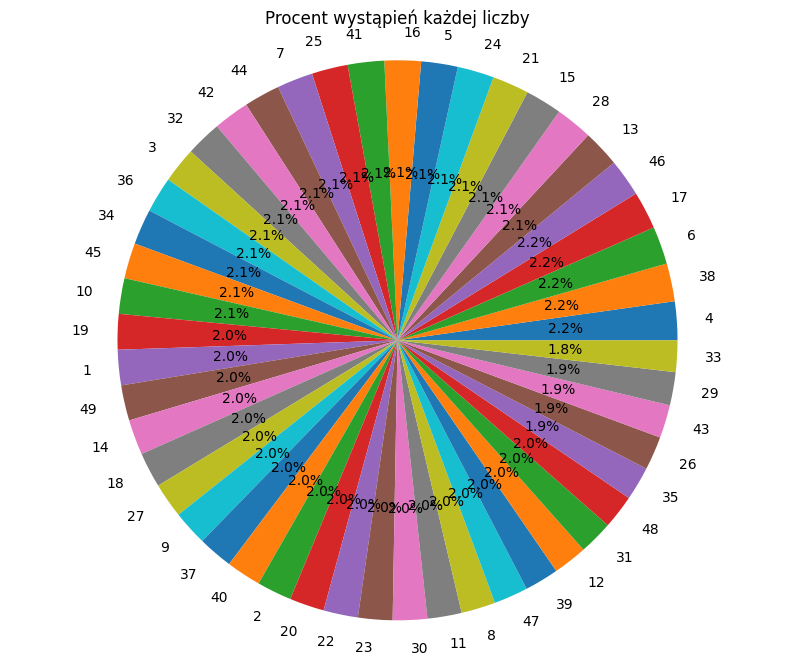

In [18]:
plt.figure(figsize=(10, 8))
plt.pie(number_counts.values, labels=number_counts.index, autopct='%1.1f%%')
plt.title('Procent wystąpień każdej liczby')
plt.axis('equal')
plt.show()